In [16]:
#Importing all the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading both Datasets
url = "https://docs.google.com/spreadsheets/d/1qsxJNwKltdW0OHMkJUyAvpu0QQWNsCWg-9zoiqQF_Y0/export?format=csv"
df_salary = pd.read_csv(url)

stats_url = "https://docs.google.com/spreadsheets/d/12rCRjkBNA5MtSFWCYvvbJfI-znAAJ-PhVuee-rl_ebk/export?format=csv"
df_stats = pd.read_csv(stats_url)

#Decided to load in the dataset through google sheets instead
#df_salary = pd.read_csv('nba_salaries.csv', encoding='latin1')
#df_stats = pd.read_csv('nba_stats.csv', sep=';', encoding='latin1')

#Basic Decriptive Stats for dataset
print(df_salary.shape)
print(df_stats.shape)

(574, 6)
(679, 30)


In [17]:
#Looking at the Salary Dataset
df_salary.head()

,Player Id,Player Name,2022/2023,2023/2024,2024/2025,2024/2025.1
0,1,Stephen Curry,"$48,070,014","$51,915,615","$55,761,217","$59,606,817"
1,2,John Wall,"$47,345,760",$0,$0,$0
2,3,Russell Westbrook,"$47,080,179",$0,$0,$0
3,4,LeBron James,"$44,474,988","$46,698,737","$50,434,636",$0
4,5,Kevin Durant,"$44,119,845","$47,649,433","$51,179,020","$54,708,608"


In [18]:
#Looking at Stats Dataset
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [19]:
#Dataset Cleaning
#1.Rename 'Player Name' Column so it matches the Stats Dataset
#and 2. Rename the year column to 'Salary'
df_salary = df_salary.rename(columns={'Player Name': 'Player',
                                      '2022/2023': 'Salary'})

#Clean the Salary numbers (Removing the symbols like '$', ',')
df_salary['Salary'] = df_salary['Salary'].astype(str).str.replace(r'[$,]', '', regex=True)
df_salary['Salary'] = pd.to_numeric(df_salary['Salary'], errors='coerce')

#Handle Duplicates in Stats Dataset
df_stats = df_stats.drop_duplicates(subset=['Player'], keep='first')

#Merge both datasets
df_merged = pd.merge(df_stats, df_salary, on='Player', how='inner')

In [20]:
#Merge Check
print(f"Merge Complete. Rows: {len(df_merged)}")
print(df_merged[['Player', 'Salary', 'PTS']].head())

Merge Complete. Rows: 467
                     Player    Salary   PTS
0          Precious Achiuwa   2840160   9.2
1              Steven Adams  17926829   8.6
2               Bam Adebayo  30351780  20.4
3              Ochai Agbaji   3918360   7.9
4  Nickeil Alexander-Walker   5009633   6.2


In [21]:
#Set up for Visualizations
#Mutiply Points * Games to get total season points
df_merged['Total Points'] = df_merged['PTS'] * df_merged['G']

#Create df_anlaysis to emphasize this is data used for the analysis and not mess up the orginal
#Filter out players with 0 points
df_analysis = df_merged[df_merged['Total Points'] > 0].copy()
#Create 'Cost per Point' Metric (Find out who is cheap but good)
df_analysis['Cost Per Point'] = df_analysis['Salary'] / df_analysis['Total Points']

/tmp/ipython-input-3025879028.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['${:,.0f}M'.format(x/1000000) for x in ticks])


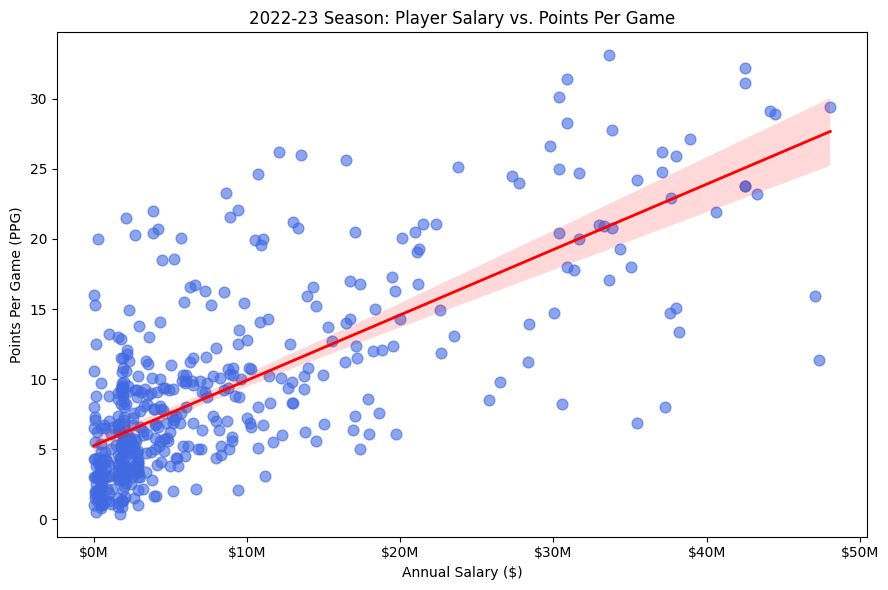

In [22]:
#Visualizations
#1st Graph: Scatterplot (Salary vs Points)
#Research Question: Does higher pay mean more points?
plt.figure(figsize=(9, 6))
sns.regplot(data=df_analysis, x='Salary', y='PTS',
            color='royalblue',
            scatter_kws={'alpha': 0.6, 's': 60},
            line_kws={'color': 'red', 'linewidth': 2})
#sns.scatterplot(data=df_analysis, x='Salary', y='PTS', alpha=0.6, s=60, color='royalblue')

plt.title('2022-23 Season: Player Salary vs. Points Per Game')
plt.xlabel('Annual Salary ($)')
plt.ylabel('Points Per Game (PPG)')

#Make the X-axis readable
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(['${:,.0f}M'.format(x/1000000) for x in ticks])

plt.tight_layout()
plt.savefig('graph1_salary_vs_ppg.png')
plt.show()

/tmp/ipython-input-1777511557.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_value, x='Cost Per Point', y='Player', palette='viridis')


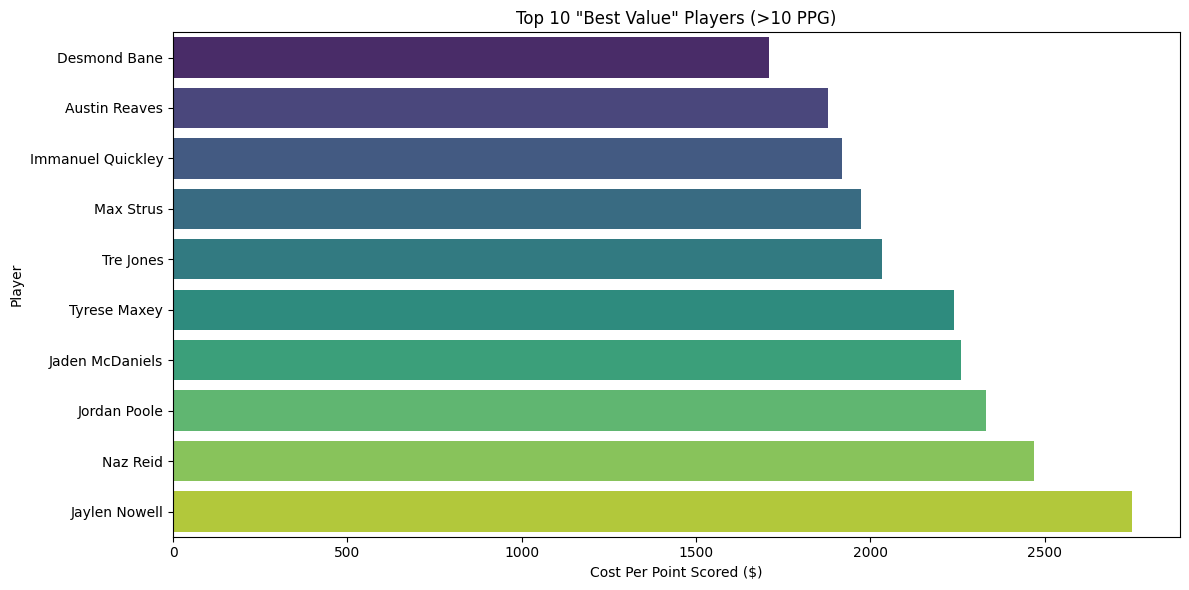

In [23]:
#2nd Graph: Bar Chart (Top 10 Best Value Players)
#Research Question: Who provided the best ROI?
#Filtered to must be a rotation player (>40 games) and scorer (>10 PPG)
df_starters = df_analysis[(df_analysis['G'] > 40) & (df_analysis['PTS'] > 10)]

top_value = df_starters.sort_values('Cost Per Point').head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_value, x='Cost Per Point', y='Player', palette='viridis')

plt.title('Top 10 "Best Value" Players (>10 PPG)')
plt.xlabel('Cost Per Point Scored ($)')
plt.tight_layout()
plt.savefig('graph2_best_value.png')
plt.show()

/tmp/ipython-input-2808931141.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['${:,.0f}M'.format(x/1000000) for x in ticks])


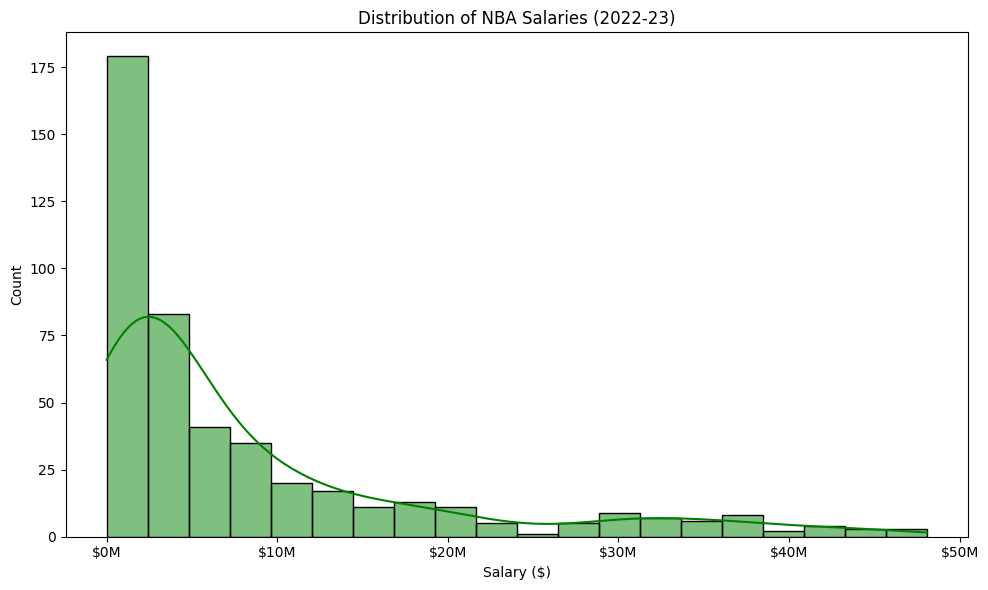

In [24]:
#3rd Graph: Histogram (Show Salary Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['Salary'], bins=20, kde=True, color='green')

plt.title('Distribution of NBA Salaries (2022-23)')
plt.xlabel('Salary ($)')

ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticklabels(['${:,.0f}M'.format(x/1000000) for x in ticks])

plt.tight_layout()
plt.savefig('graph3_salary_dist.png')
plt.show()